In [1]:
# pip install tensorflow

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.metrics import classification_report , confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [2]:
df = pd.read_csv('telco.csv')

In [3]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Stayed
1,1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,Stayed
2,2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Churned
3,3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,Stayed
4,4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Churned


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.drop('customerID', axis=1, inplace=True)

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
df['TotalCharges'].mean()

2283.3004408418656

In [10]:
df['TotalCharges'].fillna(2283.3004408418656, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1620\2599889362.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(2283.3004408418656, inplace=True)


In [11]:
# Encode Categorical features
df.select_dtypes(include='object').columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [12]:
for column in df.select_dtypes(include='object').columns:
    print(df[column].nunique(), column)

2 gender
2 SeniorCitizen
2 Partner
2 Dependents
2 PhoneService
3 MultipleLines
4 InternetService
3 OnlineSecurity
3 OnlineBackup
3 DeviceProtection
3 TechSupport
3 StreamingTV
3 StreamingMovies
3 Contract
2 PaperlessBilling
4 PaymentMethod
2 Churn


In [13]:
for column in df.select_dtypes(include='object').columns:
    if df[column].nunique() == 2:
        df[column] = LabelEncoder().fit_transform(df[column])
    else:
        df = pd.get_dummies(df, columns=[column])

In [14]:
LabelEncoder().fit_transform(df['gender'])

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [16]:
df['InternetService'].unique()

KeyError: 'InternetService'

In [17]:
df.dtypes[df.dtypes == 'object']

Series([], dtype: object)

In [18]:
for column in df.select_dtypes(include='object').columns:
    if df[column].nunique() == 2:
        df[column] = LabelEncoder().fit_transform(df[column])
    else:
        df = pd.get_dummies(df, columns=[column])

In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,1,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,1,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,0,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,1,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,0,...,True,False,False,True,False,False,False,False,True,False


In [20]:
X = df.drop('Churn' , axis=1)

In [21]:
y = df['Churn']

In [22]:
# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
X_scaled

array([[-1.00955867, -0.43991649,  1.03453023, ..., -0.52504733,
         1.40641839, -0.54480692],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -0.52504733,
        -0.71102597,  1.83551265],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -0.52504733,
        -0.71102597,  1.83551265],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ..., -0.52504733,
         1.40641839, -0.54480692],
       [ 0.99053183,  2.27315869,  1.03453023, ..., -0.52504733,
        -0.71102597,  1.83551265],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -0.52504733,
        -0.71102597, -0.54480692]])

In [24]:
# Train test split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [26]:
# Building ANN model
model = Sequential()
model.add(Dense(16, activation= 'relu', input_dim = X_train.shape[1]))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) # Binary class

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
df.shape

(7043, 42)

In [28]:
 X_train.shape[1]

41

In [41]:
model.compile(optimizer = Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [42]:
# Model train 
model.fit(X_train, y_train, epochs = 30 , validation_data = (X_test, y_test))

Epoch 1/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8175 - loss: 0.3794 - val_accuracy: 0.8197 - val_loss: 0.4123
Epoch 2/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8214 - loss: 0.3876 - val_accuracy: 0.8204 - val_loss: 0.4120
Epoch 3/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8119 - loss: 0.3910 - val_accuracy: 0.8204 - val_loss: 0.4121
Epoch 4/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8124 - loss: 0.3822 - val_accuracy: 0.8211 - val_loss: 0.4121
Epoch 5/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8209 - loss: 0.3790 - val_accuracy: 0.8204 - val_loss: 0.4123
Epoch 6/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8054 - loss: 0.3983 - val_accuracy: 0.8190 - val_loss: 0.4123
Epoch 7/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8179 - loss: 0.3875 - val_accuracy: 0.8190 - val_loss: 0.4122
Epoch 8/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8202 - loss: 0.3781 - val_accuracy: 0

In [33]:
# Evaluate
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[205 168]
 [ 90 946]]
              precision    recall  f1-score   support

           0       0.69      0.55      0.61       373
           1       0.85      0.91      0.88      1036

    accuracy                           0.82      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [32]:
model.predict(X_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0.28648594],
       [0.89009005],
       [0.9978394 ],
       ...,
       [0.9605466 ],
       [0.99656975],
       [0.3460228 ]], dtype=float32)

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

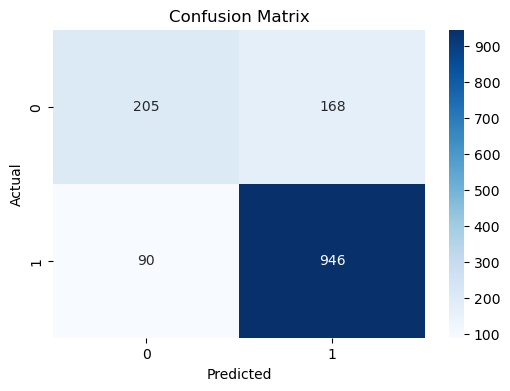

In [38]:
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [39]:
X_test.shape

(1409, 41)

In [40]:
X_train.shape

(5634, 41)